# Прогнозирование стоимости аренды квартиры на месяц, основываясь на данных с Авито

### Создание собственного датасета. Парсим страницы с объявлениями о сдаче квартиры на месяц

In [6]:
import pandas as pd
import itertools 
from bs4 import BeautifulSoup  # для парсинга старниц
import requests                # для запросов к сайту, получения содержимого веб-страницы
from requests import get
import time
from random import seed

#соберём объявления со всех доступных страницы 

url = 'https://www.avito.ru/lipetsk/kvartiry/sdam/na_dlitelnyy_srok-ASgBAgICAkSSA8gQ8AeQUg?cd=1&rn=25934&p='

houses = []

count = 1

while count <= 100:
    new_count = 0
    if count == 1:
        first_page = 'https://www.avito.ru/lipetsk/kvartiry/sdam/na_dlitelnyy_srok-ASgBAgICAkSSA8gQ8AeQUg?cd=1&rn=25934&p=1'
        response = get(first_page)

        html_soup = BeautifulSoup(response.text, 'html.parser')

        house_data = html_soup.find_all('div', class_="item__line")   # ячейка с объявление на сайте
  
        print(first_page)
        
        if house_data != []:
            houses.extend(house_data)
            value = random()
            scaled_value = 1 + (value * (9 - 5))
            print(scaled_value)
            time.sleep(scaled_value) # создаём задержку, чтобы не создавать слишком много запросов на сайт
    elif count != 1:
        url = 'https://www.avito.ru/lipetsk/kvartiry/sdam/na_dlitelnyy_srok-ASgBAgICAkSSA8gQ8AeQUg?cd=1&rn=25934&p=' + str(count)
        print(url)
        response = get(url)
        html_soup = BeautifulSoup(response.text, 'html.parser')

        house_data = html_soup.find_all('div', class_="item__line")
        if house_data != []:
            houses.extend(house_data)
            value = random()
            scaled_value = 1 + (value * (9 - 5))
            print(scaled_value)
            time.sleep(scaled_value)
        else:
            print('empty')
            break
    count += 1

/home/peoples/.local/lib/python3.5/site-packages/requests/__init__.py:91: RequestsDependencyWarning: urllib3 (1.24.1) or chardet (3.0.4) doesn't match a supported version!
  RequestsDependencyWarning)


https://www.avito.ru/lipetsk/kvartiry/sdam/na_dlitelnyy_srok-ASgBAgICAkSSA8gQ8AeQUg?cd=1&rn=25934&p=1
1.1297513294370836
https://www.avito.ru/lipetsk/kvartiry/sdam/na_dlitelnyy_srok-ASgBAgICAkSSA8gQ8AeQUg?cd=1&rn=25934&p=2
3.7644584250576054
https://www.avito.ru/lipetsk/kvartiry/sdam/na_dlitelnyy_srok-ASgBAgICAkSSA8gQ8AeQUg?cd=1&rn=25934&p=3
3.9698158606910687
https://www.avito.ru/lipetsk/kvartiry/sdam/na_dlitelnyy_srok-ASgBAgICAkSSA8gQ8AeQUg?cd=1&rn=25934&p=4
2.9159889614841847
https://www.avito.ru/lipetsk/kvartiry/sdam/na_dlitelnyy_srok-ASgBAgICAkSSA8gQ8AeQUg?cd=1&rn=25934&p=5
3.097815161906051
https://www.avito.ru/lipetsk/kvartiry/sdam/na_dlitelnyy_srok-ASgBAgICAkSSA8gQ8AeQUg?cd=1&rn=25934&p=6
4.920692775099104
https://www.avito.ru/lipetsk/kvartiry/sdam/na_dlitelnyy_srok-ASgBAgICAkSSA8gQ8AeQUg?cd=1&rn=25934&p=7
4.333013040940822
https://www.avito.ru/lipetsk/kvartiry/sdam/na_dlitelnyy_srok-ASgBAgICAkSSA8gQ8AeQUg?cd=1&rn=25934&p=8
1.148331566543146
https://www.avito.ru/lipetsk/kvartir

In [7]:
len(houses) # количество объявлений 

551

In [8]:
print(houses[1]) # содержимое одного объявления 

<div class="item__line">
<div class="item-photo " data-marker="item-photo">
<a class="js-item-slider item-slider" href="/lipetsk/kvartiry/2-k_kvartira_54_m_1010_et._552503425" target="_blank"> <ul class="item-slider-list js-item-slider-list">
<li class="item-slider-item js-item-slider-item ">
<div class="item-slider-image">
<img alt="2-к квартира, 54 м², 10/10 эт." class="large-picture-img" src="https://34.img.avito.st/208x156/4417011534.jpg" srcset="https://34.img.avito.st/208x156/4417011534.jpg 1x, https://34.img.avito.st/image/1/kwvq1La_P-Kccc3kwIqMFHx3OehUtzsQWHc95FJxPeJeMQ 1.5x">
</img></div>
</li>
<li class="item-slider-item js-item-slider-item ">
<div class="item-slider-image">
<img alt="2-к квартира, 54 м², 10/10 эт." class="large-picture-img" src="https://82.img.avito.st/208x156/4417011582.jpg" srcset="https://82.img.avito.st/208x156/4417011582.jpg 1x, https://82.img.avito.st/image/1/owvq1La_D-Kccf3koIq8FHx3CehUtwsQWHcN5FJxDeJeMQ 1.5x">
</img></div>
</li>
<li class="item-slide

In [139]:
## DATA FORMATTING 
import re # для регулярных выражений
import numpy as np
from geopy.geocoders import Nominatim # библиотека для работы с геоданными

geolocator = Nominatim()

def get_coors(room_address):
    '''
    Возвращает значения широты и долготы запрашиваемого адреса.
    room_address - адрес которого определяется геолокация
    location.latitude - широта
    location.longitude - долгота 
    '''
    location = geolocator.geocode(room_address) 
    print(room_address, ' ',location.latitude, ' ',location.longitude )
    return (location.latitude, location.longitude) 

# получаем отдельные значения цены, количества комнат, площади команты и т.д. из html-разметки
count = 0
house_price = []
location = []
city = []
surface = []
floor_in_house = []
rooms_in_house = []
total_house_floors = []
agency = []
address_room = []
lat = []
long = []

n = int(len(houses)) - 1

while count <= n:
    num = houses[int(count)]
    
    price = num.find('span',{"class":"snippet-price"}).text
    house_price.append(price)
    df_price = pd.DataFrame({'house_price':house_price})
    df_price['house_price'] = df_price['house_price'].str.replace("\D","")
    df_price['house_price'] = df_price['house_price'].str.replace("в месяц","")
    
    title = num.find('a',{"class":"snippet-link"}).text
    print(title)

    try:
        regex_matched = re.findall(r'(\d+)-к квартира, (\d+\.?\d*) м²(?:.*?), (\d+)\/(\d+) эт.', title)
        size = regex_matched[0][1]
        rooms = regex_matched[0][0]
        floor = regex_matched[0][2]
        total_f = regex_matched[0][3]
    except Exception as e:
        count += 1
        continue
    
    floor_in_house.append(floor)
    surface.append(size)
    rooms_in_house.append(rooms)
    total_house_floors.append(total_f)
    
    df_surface = pd.DataFrame({'surface':surface})
    
    df_rooms = pd.DataFrame({'rooms_in_house':rooms_in_house})
    df_rooms['rooms_in_house'] = df_rooms['rooms_in_house'].str.replace("\D","")
    
    df_floors = pd.DataFrame({'floor_in_house':floor_in_house})
    df_floors['floor_in_house'] = df_floors['floor_in_house'].str.replace("\D","")
    
    df_total_floors = pd.DataFrame({'total_house_floors':total_house_floors})
    df_total_floors['total_house_floors'] = df_total_floors['total_house_floors'].str.replace("\D","")
    
    address = num.find('span',{"class":"item-address__string"}).text
    district = ''
    try:
        district = num.find('span',{"class":"item-address-georeferences-item__content"}).text
    except Exception as e:
        district = ''
        
    full_address = address + ', ' + district if 'Липецк' in address else 'Липецк, ' + address + ', ' + district
    just_address = address  if 'Липецк' in address else 'Липецк, ' + address
    location.append(full_address)
    address_room.append(just_address)
    
    df_location  = pd.DataFrame({'location':location})
    df_location['location'] = df_location['location'].str.replace("\n","")
    
    df_address  = pd.DataFrame({'address':address_room})
    df_address['address'] = df_address['address'].str.replace("\n","")
    
    
    by_agency = num.find('div',{"class":"data"}).text
    agency.append(True if 'Агентство' in by_agency else False)
    df_agency  = pd.DataFrame({'agency':agency})
    
    coords = None
    try:
        coords =  get_coors(just_address)
    except Exception as e:
        coords = (np.nan, np.nan)  # при ошибки получения координа ставив временное значение np.nan
    lat.append(coords[0])
    long.append(coords[1])
    
    df_latitude = pd.DataFrame({'latitude': lat})
    df_longitude = pd.DataFrame({'longitude': long}) 

    count += 1
    print(count)

# объединяем данные в одну таблицу
result = pd.concat([df_price, df_surface], axis=1, sort=False)
result2 = pd.concat([result, df_rooms], axis=1, sort=False)
result3 = pd.concat([result2, df_floors], axis=1, sort=False)
result4 = pd.concat([result3,  df_total_floors], axis=1, sort=False)
result5 = pd.concat([result4,  df_agency], axis=1, sort=False)
result6 = pd.concat([result5,  df_address], axis=1, sort=False)
result7 = pd.concat([result6,  df_latitude], axis=1, sort=False)
result8 = pd.concat([result7,  df_longitude], axis=1, sort=False)
dfa = pd.concat([result8,  df_location], axis=1, sort=False)

/home/peoples/.local/lib/python3.5/site-packages/ipykernel_launcher.py:6: DeprecationWarning: Using Nominatim with the default "geopy/1.22.0" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.
  


1-к квартира, 47 м², 8/10 эт.
Липецк, 
 улица Белянского, 12
    52.606946449999995   39.50181181484047
1
2-к квартира, 54 м², 10/10 эт.
Липецк, 
 ул. Валентины Терешковой, 29А
    52.61310095   39.57484113518641
2
1-к квартира, 50 м², 9/16 эт.
Липецк, 
 ул. Космонавтов, 3А
    52.61672455   39.580665518235364
3
2-к квартира, 56 м², 8/16 эт.
Липецк, 
 ул. Свиридова, 8
    52.57901175   39.50515657827046
4
2-к квартира, 62 м², 3/9 эт.


KeyboardInterrupt: 

In [10]:
dfa.head() # 5 первых значений сформированной таблицы 

,house_price,surface,rooms_in_house,floor_in_house,total_house_floors,agency,address,latitude,longitude,location
0,10000,47,1,8,10,False,"Липецк, улица Белянского, 12",52.606946,39.501812,"Липецк, улица Белянского, 12 , р-н Советский"
1,16000,54,2,10,10,False,"Липецк, ул. Валентины Терешковой, 29А",52.613101,39.574841,"Липецк, ул. Валентины Терешковой, 29А , р-н С..."
2,20000,50,1,9,16,False,"Липецк, ул. Космонавтов, 3А",52.616725,39.580666,"Липецк, ул. Космонавтов, 3А , р-н Советский"
3,9000,56,2,8,16,True,"Липецк, ул. Свиридова, 8",52.579012,39.505157,"Липецк, ул. Свиридова, 8 , р-н Октябрьский"
4,13000,62,2,3,9,True,"Липецк, ул Гоголя, 21",52.600304,39.569288,"Липецк, ул Гоголя, 21 , р-н Октябрьский"


In [11]:
# добавим новый признак, находится ли квартира на последнем этаже здания
dfa['is_last_floor'] = dfa['floor_in_house'] == dfa['total_house_floors']

In [12]:
dfa.head()

,house_price,surface,rooms_in_house,floor_in_house,total_house_floors,agency,address,latitude,longitude,location,is_last_floor
0,10000,47,1,8,10,False,"Липецк, улица Белянского, 12",52.606946,39.501812,"Липецк, улица Белянского, 12 , р-н Советский",False
1,16000,54,2,10,10,False,"Липецк, ул. Валентины Терешковой, 29А",52.613101,39.574841,"Липецк, ул. Валентины Терешковой, 29А , р-н С...",True
2,20000,50,1,9,16,False,"Липецк, ул. Космонавтов, 3А",52.616725,39.580666,"Липецк, ул. Космонавтов, 3А , р-н Советский",False
3,9000,56,2,8,16,True,"Липецк, ул. Свиридова, 8",52.579012,39.505157,"Липецк, ул. Свиридова, 8 , р-н Октябрьский",False
4,13000,62,2,3,9,True,"Липецк, ул Гоголя, 21",52.600304,39.569288,"Липецк, ул Гоголя, 21 , р-н Октябрьский",False


In [13]:
dfa.isnull().sum(axis = 0) # смотрим, есть ли пропуски в данных

house_price            0
surface                5
rooms_in_house         5
floor_in_house         5
total_house_floors     5
agency                 5
address                5
latitude              91
longitude             91
location               5
is_last_floor          0
dtype: int64

In [14]:
dfa = dfa.fillna(dfa.mean()) # заменяем отсутствующие значения на среднее 

In [16]:
dfa = dfa[:546] # отсекаем ошибочные данные
dfa

,house_price,surface,rooms_in_house,floor_in_house,total_house_floors,agency,address,latitude,longitude,location,is_last_floor
0,10000,47,1,8,10,False,"Липецк, улица Белянского, 12",52.606946,39.501812,"Липецк, улица Белянского, 12 , р-н Советский",False
1,16000,54,2,10,10,False,"Липецк, ул. Валентины Терешковой, 29А",52.613101,39.574841,"Липецк, ул. Валентины Терешковой, 29А , р-н С...",True
2,20000,50,1,9,16,False,"Липецк, ул. Космонавтов, 3А",52.616725,39.580666,"Липецк, ул. Космонавтов, 3А , р-н Советский",False
3,9000,56,2,8,16,True,"Липецк, ул. Свиридова, 8",52.579012,39.505157,"Липецк, ул. Свиридова, 8 , р-н Октябрьский",False
4,13000,62,2,3,9,True,"Липецк, ул Гоголя, 21",52.600304,39.569288,"Липецк, ул Гоголя, 21 , р-н Октябрьский",False
5,15000,49,2,5,9,False,"Липецк, Московская ул., 139",52.597482,39.512588,"Липецк, Московская ул., 139 , р-н Советский",False
6,10000,45.8,1,20,22,False,"Липецк, ул. Бехтеева, 5",52.605414,39.507691,"Липецк, ул. Бехтеева, 5 , р-н Советский",False
7,8500,18.5,1,4,5,False,"Липецк, ул. Циолковского, 4/2",52.616263,39.548112,"Липецк, ул. Циолковского, 4/2 , р-н Советский",False
8,12000,52,2,7,10,True,"Липецк, ул. Стаханова, 39",52.586374,39.522804,"Липецк, ул. Стаханова, 39 , р-н Октябрьский",False
9,12000,41,1,14,17,False,"Липецк, ул. Свиридова",52.576811,39.519396,"Липецк, ул. Свиридова , р-н Октябрьский",False


In [17]:
import geopy.distance

def get_distance(coord1,coord2):
    '''
    Возвращает расстояние в километрах между 2 точками coord1 и coord2
    coord1,coord2 - кортежи формата (широта, долгота)
    '''
    dist = geopy.distance.distance(coord1, coord2).km
    return dist

#center_lipetsk = (52.36, 39.35)
# для расчёта удалённости квартиры от центра города, выберем условный центр
center_lipetck =  get_coors('Липецк, Соборная площадь') 

Липецк, Соборная площадь   52.6088113   39.5980289


In [18]:
# добавляем в талицу столбец с расстоянием квартиры до центра города
x = dfa['latitude'].astype(str) + ',' + dfa['longitude'].astype(str)
dfa['dist'] = [get_distance(x[i],center_lipetck) for i in range(dfa.shape[0])]

/home/peoples/.local/lib/python3.5/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [19]:
dfa.isnull().sum(axis = 0)

house_price           0
surface               0
rooms_in_house        0
floor_in_house        0
total_house_floors    0
agency                0
address               0
latitude              0
longitude             0
location              0
is_last_floor         0
dist                  0
dtype: int64

In [20]:
dfa.head()

,house_price,surface,rooms_in_house,floor_in_house,total_house_floors,agency,address,latitude,longitude,location,is_last_floor,dist
0,10000,47,1,8,10,False,"Липецк, улица Белянского, 12",52.606946,39.501812,"Липецк, улица Белянского, 12 , р-н Советский",False,6.521422
1,16000,54,2,10,10,False,"Липецк, ул. Валентины Терешковой, 29А",52.613101,39.574841,"Липецк, ул. Валентины Терешковой, 29А , р-н С...",True,1.641652
2,20000,50,1,9,16,False,"Липецк, ул. Космонавтов, 3А",52.616725,39.580666,"Липецк, ул. Космонавтов, 3А , р-н Советский",False,1.469253
3,9000,56,2,8,16,True,"Липецк, ул. Свиридова, 8",52.579012,39.505157,"Липецк, ул. Свиридова, 8 , р-н Октябрьский",False,7.113702
4,13000,62,2,3,9,True,"Липецк, ул Гоголя, 21",52.600304,39.569288,"Липецк, ул Гоголя, 21 , р-н Октябрьский",False,2.165063


In [21]:
# сохраняем сформированный датасет в csv файл, чтобы не парсить и не обрабатывать данные снова
#dfa.to_csv('avito_apartment_advanced.csv', sep='\t', index = False)

In [141]:
import pandas as pd
# читаем данные из файла, если необходимо 
dfa = pd.read_csv('avito_apartment_advanced.csv', sep='\t')
dfa.head()

,house_price,surface,rooms_in_house,floor_in_house,total_house_floors,agency,address,latitude,longitude,location,is_last_floor,dist
0,10000,47.0,1,8,10,False,"Липецк, улица Белянского, 12",52.606946,39.501812,"Липецк, улица Белянского, 12 , р-н Советский",False,6.521422
1,16000,54.0,2,10,10,False,"Липецк, ул. Валентины Терешковой, 29А",52.613101,39.574841,"Липецк, ул. Валентины Терешковой, 29А , р-н С...",True,1.641652
2,20000,50.0,1,9,16,False,"Липецк, ул. Космонавтов, 3А",52.616725,39.580666,"Липецк, ул. Космонавтов, 3А , р-н Советский",False,1.469253
3,9000,56.0,2,8,16,True,"Липецк, ул. Свиридова, 8",52.579012,39.505157,"Липецк, ул. Свиридова, 8 , р-н Октябрьский",False,7.113702
4,13000,62.0,2,3,9,True,"Липецк, ул Гоголя, 21",52.600304,39.569288,"Липецк, ул Гоголя, 21 , р-н Октябрьский",False,2.165063


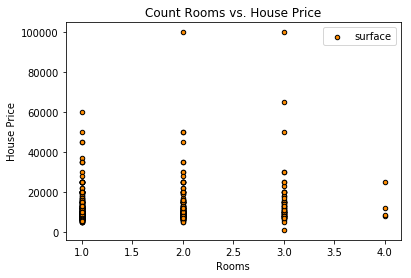

In [142]:
import matplotlib.pyplot as plt
%matplotlib inline 

# посомтрим как соотносятся количество комнат и цена квартиры
plt.figure()
plt.scatter(dfa['rooms_in_house'],dfa['house_price'], s=20, edgecolor="black",c="darkorange", label="surface")
plt.xlabel("Rooms")
plt.ylabel("House Price")
plt.title("Count Rooms vs. House Price")
plt.legend()
plt.show()

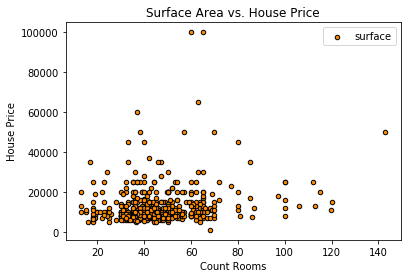

In [25]:
# посомтрим как соотносятся площадь и цена квартиры
plt.scatter(dfa['surface'],dfa['house_price'], s=20, edgecolor="black",c="darkorange", label="surface")
plt.xlabel("Count Rooms")
plt.ylabel("House Price")
plt.title("Surface Area vs. House Price")
plt.legend()
plt.show()

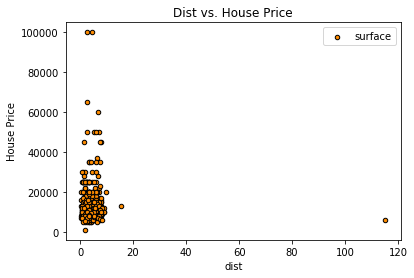

In [26]:
# расстояние до центра и цена квартиры
plt.scatter(dfa['dist'],dfa['house_price'], s=20, edgecolor="black",c="darkorange", label="surface")
plt.xlabel("dist")
plt.ylabel("House Price")
plt.title("Dist vs. House Price")
plt.legend()
plt.show()

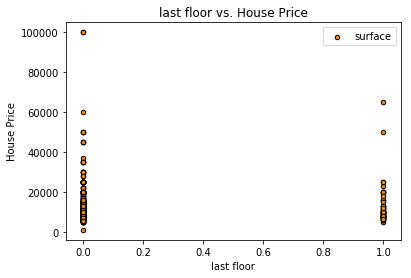

In [28]:
# влияет ли то, что квартира на последнем этаже
plt.scatter(dfa['is_last_floor'],dfa['house_price'], s=20, edgecolor="black",c="darkorange", label="surface")
plt.xlabel("last floor")
plt.ylabel("House Price")
plt.title("last floor vs. House Price")
plt.legend()
plt.show()

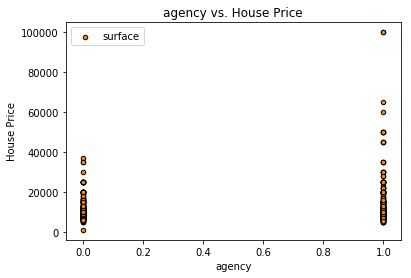

In [29]:
# влияние агенста на цену 
plt.scatter(dfa['agency'],dfa['house_price'], s=20, edgecolor="black",c="darkorange", label="surface")
plt.xlabel("agency")
plt.ylabel("House Price")
plt.title("agency vs. House Price")
plt.legend()
plt.show()

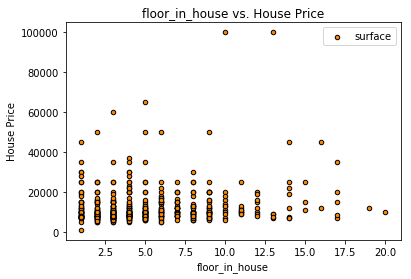

In [32]:
# номер этажа квартиры и цена
plt.scatter(dfa['floor_in_house'],dfa['house_price'], s=20, edgecolor="black",c="darkorange", label="surface")
plt.xlabel("floor_in_house")
plt.ylabel("House Price")
plt.title("floor_in_house vs. House Price")
plt.legend()
plt.show()

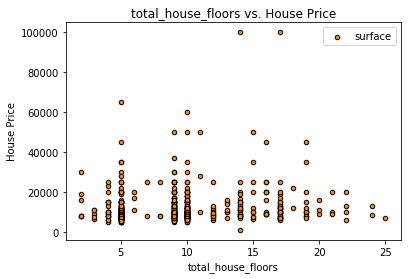

In [33]:
# всего этажей в дома
plt.scatter(dfa['total_house_floors'],dfa['house_price'], s=20, edgecolor="black",c="darkorange", label="surface")
plt.xlabel("total_house_floors")
plt.ylabel("House Price")
plt.title("total_house_floors vs. House Price")
plt.legend()
plt.show()

In [37]:
# удаляем неинформативные данные 
dfa = dfa.drop(['address','latitude', 'longitude', 'location', 'total_house_floors'], axis=1)

KeyError: "['address' 'latitude' 'longitude' 'location' 'total_house_floors'] not found in axis"

In [38]:
dfa

,house_price,surface,rooms_in_house,floor_in_house,agency,is_last_floor,dist
0,10000,47.0,1,8,False,False,6.521422
1,16000,54.0,2,10,False,True,1.641652
2,20000,50.0,1,9,False,False,1.469253
3,9000,56.0,2,8,True,False,7.113702
4,13000,62.0,2,3,True,False,2.165063
5,15000,49.0,2,5,False,False,5.924391
6,10000,45.8,1,20,False,False,6.131612
7,8500,18.5,1,4,False,False,3.481425
8,12000,52.0,2,7,True,False,5.675885
9,12000,41.0,1,14,False,False,6.409027


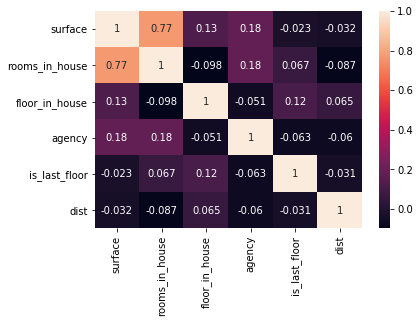

In [41]:
import seaborn as sn

#посмотрим на корреляцию признаков
X = dfa.drop(['house_price'], axis=1)

corrMatrix = X.corr()

sn.heatmap(corrMatrix, annot=True)
plt.show()

In [42]:
# Площадь квартиры сильно коррелирует с количеством комнат, поэту заменим 2 признака на 1
dfa['surface_per_room'] = dfa['surface']/dfa['rooms_in_house']

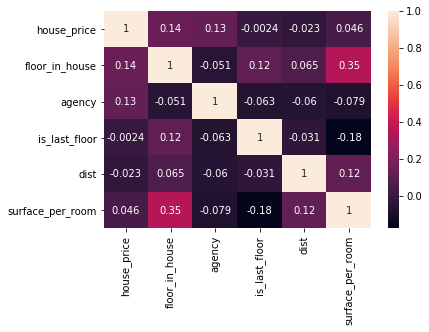

In [43]:
dfa = dfa.drop(['surface','rooms_in_house'],axis=1)
X = dfa

corrMatrix = X.corr()

sn.heatmap(corrMatrix, annot=True)
plt.show()

In [44]:
dfa.head()

,house_price,floor_in_house,agency,is_last_floor,dist,surface_per_room
0,10000,8,False,False,6.521422,47.0
1,16000,10,False,True,1.641652,27.0
2,20000,9,False,False,1.469253,50.0
3,9000,8,True,False,7.113702,28.0
4,13000,3,True,False,2.165063,31.0


In [49]:
# преобразуем данные из bool в int
replacer = {True: 1, False: 0}
dfa['agency'] = dfa['agency'].map(replacer)
dfa['is_last_floor'] = dfa['is_last_floor'].map(replacer)
dfa.head()

,house_price,floor_in_house,agency,is_last_floor,dist,surface_per_room
0,10000,8,0,0,6.521422,47.0
1,16000,10,0,1,1.641652,27.0
2,20000,9,0,0,1.469253,50.0
3,9000,8,1,0,7.113702,28.0
4,13000,3,1,0,2.165063,31.0


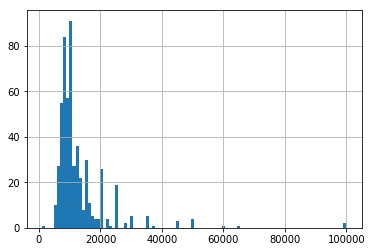

In [50]:
# строим столбчатую диаграмму, чтобы посмотреть на выбросы данных
dfa['house_price'].hist(bins=100)

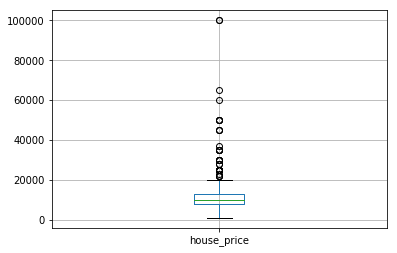

In [52]:
dfa.boxplot(column=['house_price'])

In [59]:
# избавляемся от выбросов
dfa = dfa[dfa.apply(lambda x: np.abs(x - x.mean())/x.std() < 3).all(axis=1)]

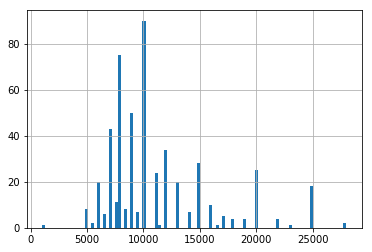

In [60]:
dfa['house_price'].hist(bins=100)

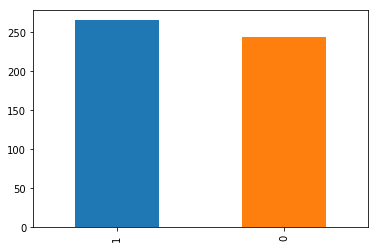

In [64]:
# cмотрим пропорционально ли количество квартир, которые сдают агенства и просто хозяева
dfa['agency'].value_counts().plot.bar()

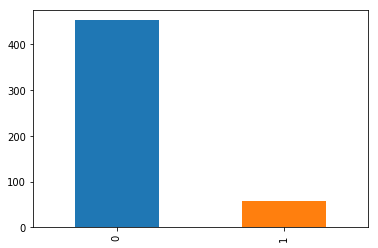

In [65]:
# cмотрим пропорционально ли количество квартир, которые находятся на последнем этаже
dfa['is_last_floor'].value_counts().plot.bar()

In [70]:
# избавляемся от дубликатов данных, если они есть
df_dedupped = dfa.drop_duplicates()

# сравниваем формы старого и нового наборов
print(dfa.shape)
print(df_dedupped.shape)

(509, 6)
(508, 6)


In [71]:
dfa['house_price'] = pd.to_numeric(dfa['house_price'])
dfa.head()

,house_price,floor_in_house,agency,is_last_floor,dist,surface_per_room
0,10000,8,0,0,6.521422,47.0
1,16000,10,0,1,1.641652,27.0
2,20000,9,0,0,1.469253,50.0
3,9000,8,1,0,7.113702,28.0
4,13000,3,1,0,2.165063,31.0


In [72]:
import numpy as np

# готовим данные для обучения 
target= np.array(dfa['house_price'])
features = dfa.drop('house_price', axis = 1)
feature_list = list(features.columns)
features = np.array(features)

In [73]:
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestRegressor
 
# Используем модель Случайного леса и метод KFold для валидации 
kf = KFold(n_splits=10,random_state=42,shuffle=True)
accuracies = []
for train_index, test_index in kf.split(features):

    data_train   = features[train_index]
    target_train = target[train_index]

    data_test    = features[test_index]
    target_test  = target[test_index]

    rf = RandomForestRegressor(n_estimators = 1000, 
                               random_state = 42, 
                               criterion = 'mse',
                               bootstrap=True)
    
    rf.fit(data_train, target_train)

    predictions = rf.predict(data_test)

    errors = abs(predictions - target_test)

    print('Mean Absolute Error:', round(np.mean(errors), 2))
    
    mape = 100 * (errors / target_test)
    accuracy = 100 - np.mean(mape)
    print('Accuracy:', round(accuracy, 2), '%.')

    accuracies.append(accuracy)

average_accuracy = np.mean(accuracies)
print('Average accuracy:', average_accuracy)

Mean Absolute Error: 4103.43
Accuracy: 53.53 %.
Mean Absolute Error: 3427.03
Accuracy: 64.92 %.
Mean Absolute Error: 3987.33
Accuracy: 70.98 %.
Mean Absolute Error: 4170.03
Accuracy: 59.68 %.
Mean Absolute Error: 3458.89
Accuracy: 65.31 %.
Mean Absolute Error: 2948.53
Accuracy: 70.93 %.
Mean Absolute Error: 3345.42
Accuracy: 45.84 %.
Mean Absolute Error: 3960.12
Accuracy: 65.63 %.
Mean Absolute Error: 4551.59
Accuracy: 60.48 %.
Mean Absolute Error: 3170.32
Accuracy: 69.22 %.
Average accuracy: 62.648839930959035


In [75]:
from sklearn.model_selection import RandomizedSearchCV

# подбираем гиперпараметры 
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]

max_features = ['auto', 'sqrt']

max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)

min_samples_split = [2, 5, 10]

min_samples_leaf = [1, 2, 4]

bootstrap = [True, False]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False], 'min_samples_split': [2, 5, 10], 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None]}


In [76]:
rf = RandomForestRegressor()

rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)

rf_random.fit(data_train, target_train)

print(rf_random.best_params_)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    9.8s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   42.0s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  1.4min finished


{'min_samples_leaf': 4, 'bootstrap': True, 'min_samples_split': 10, 'n_estimators': 800, 'max_features': 'sqrt', 'max_depth': 100}


In [103]:
## RANDOM FOREST - KFOLD AND MODEL 
# снова запускам модель с подобранными параметрами 
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestRegressor
    
kf = KFold(n_splits=10,random_state=42,shuffle=True)
accuracies = []
for train_index, test_index in kf.split(features):

    data_train   = features[train_index]
    target_train = target[train_index]

    data_test    = features[test_index]
    target_test  = target[test_index]

    rf = RandomForestRegressor(n_estimators = 900, 
                               random_state = 42, 
                               criterion = 'mse',
                               min_samples_leaf = 10,
                               min_samples_split= 10,
                               max_features = 'sqrt',
                               bootstrap=True,
                               max_depth = 100)
    
    rf.fit(data_train, target_train)

    predictions = rf.predict(data_test)

    errors = abs(predictions - target_test)

    print('Mean Absolute Error:', round(np.mean(errors), 2))
    
    mape = 100 * (errors / target_test)
    accuracy = 100 - np.mean(mape)
    print('Accuracy:', round(accuracy, 2), '%.')

    accuracies.append(accuracy)

average_accuracy = np.mean(accuracies)
print('Average accuracy:', average_accuracy)

Mean Absolute Error: 3797.91
Accuracy: 57.28 %.
Mean Absolute Error: 3289.98
Accuracy: 66.54 %.
Mean Absolute Error: 3844.17
Accuracy: 71.48 %.
Mean Absolute Error: 3884.34
Accuracy: 63.94 %.
Mean Absolute Error: 3067.39
Accuracy: 69.36 %.
Mean Absolute Error: 2672.88
Accuracy: 74.2 %.
Mean Absolute Error: 2753.1
Accuracy: 58.04 %.
Mean Absolute Error: 3765.89
Accuracy: 68.18 %.
Mean Absolute Error: 4438.72
Accuracy: 62.37 %.
Mean Absolute Error: 3530.27
Accuracy: 65.71 %.
Average accuracy: 65.7100403166219


In [88]:
dfa.head()

,house_price,floor_in_house,agency,dist,surface_per_room
0,10000,8,0,6.521422,47.0
1,16000,10,0,1.641652,27.0
2,20000,9,0,1.469253,50.0
3,9000,8,1,7.113702,28.0
4,13000,3,1,2.165063,31.0


In [110]:
#p делаем пример предстказания 
newdata = pd.DataFrame().reindex_like(dfa)
newdata.fillna(value=0, inplace=True)


del newdata['house_price']
newdata = newdata.iloc[[1]]


newdata['floor_in_house'] = 1
newdata['surface_per_room'] = 45
newdata['agency'] = True
newdata['dist'] = 2.2

rf.predict(newdata) # стоимость квартиры с указанными характеристиками 

array([12175.43593473])

In [128]:
y = rf.feature_importances_
list_y = [a for a in y if a > 0.005]
print(list_y)

list_of_index = []
for i in list_y:
    a = np.where(y==i)
    list_of_index.append(a)
print(list_of_index)


[0.19437525260598465, 0.04753448361394065, 0.39988972927868754, 0.3582005345013872]
[(array([0]),), (array([1]),), (array([2]),), (array([3]),)]


In [129]:
list_of_index = [0,1,2,3]

In [130]:
col = []
for i in feature_list:
    col.append(i)
labels = []
for i in list_of_index:
    b = col[i]
    labels.append(b)

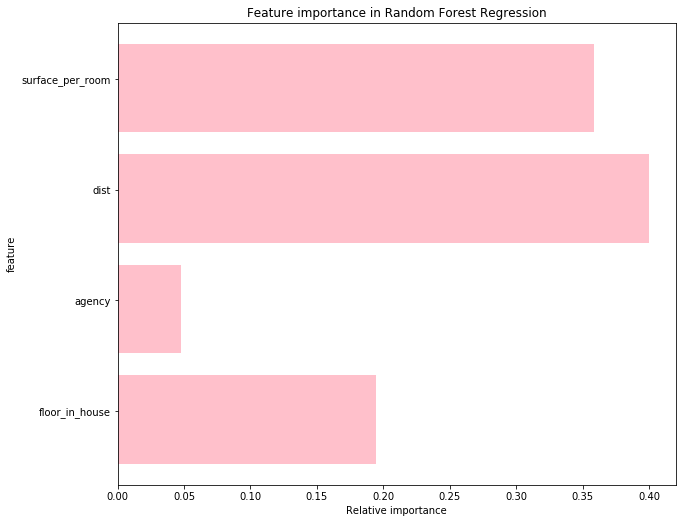

<Figure size 720x612 with 0 Axes>

In [131]:
import matplotlib.pyplot as plt
# выведем какие фичи модель посчитала самыми значимыми 
y = list_y
fig, ax = plt.subplots() 
width = 0.8
ind = np.arange(len(y)) 
ax.barh(ind, y,width, color="pink")
ax.set_yticks(ind+width/10)
ax.set_yticklabels(labels, minor=False)
plt.title('Feature importance in Random Forest Regression')
plt.xlabel('Relative importance')
plt.ylabel('feature') 
plt.figure(figsize=(10,8.5))
fig.set_size_inches(10, 8.5, forward=True)

In [136]:
import pickle

# сохраним обученную модель в файл
with open('apartment.pkl','wb') as f:
    pickle.dump(rf,f)